In [177]:
import pandas as pd
import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Решал с помощью модели ARIMA

In [178]:
df = pd.read_excel('usdrub.xlsx')

In [179]:
df['dDate'] = pd.to_datetime(df['dDate']).dt.date.astype('datetime64[ns]')
df = df.sort_values(by='dDate').reset_index(drop=True)

In [180]:
df.set_index('dDate', inplace = True)

<AxesSubplot:xlabel='dDate'>

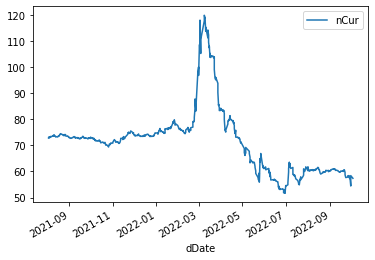

In [181]:
df.plot()

In [213]:
#Подбирал значения, чтобы уменьшить показатель AIC
ar=4
i=2
ma=8
arima_mod = ARIMA(df,order=(ar,i,ma))
arima_res = arima_mod.fit()
print(arima_res.summary())

                               SARIMAX Results                                
Dep. Variable:                   nCur   No. Observations:                  591
Model:                 ARIMA(4, 2, 8)   Log Likelihood               -1030.446
Date:                Sun, 09 Oct 2022   AIC                           2086.891
Time:                        20:15:12   BIC                           2143.811
Sample:                             0   HQIC                          2109.067
                                - 591                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4221      0.086     -4.882      0.000      -0.592      -0.253
ar.L2         -1.1180      0.109    -10.300      0.000      -1.331      -0.905
ar.L3         -0.0894      0.086     -1.036      0.3

## предсказание на 1 шаг

In [214]:
print(arima_res.forecast())

591    57.37501
dtype: float64


## предсказание на 10 шагов

In [215]:
forecast = arima_res.get_forecast(steps=10)
df_10 = pd.DataFrame(columns=['forecast', 'predict_low','predict_up'])

In [216]:
df_10['forecast']=forecast.predicted_mean
df_10['predict_low']=forecast.conf_int()['lower nCur']
df_10['predict_up']=forecast.conf_int()['upper nCur']

In [217]:
df_10

,forecast,predict_low,predict_up
591,57.375010,54.661098,60.088922
592,57.527892,54.063857,60.991927
593,57.172776,52.890865,61.454687
594,57.647895,52.594799,62.700991
595,57.789717,52.060092,63.519342
596,58.011404,51.461357,64.561451
597,57.822679,50.443921,65.201437
598,57.361022,49.224808,65.497235
599,57.592151,48.869628,66.314674
600,57.842504,48.599282,67.085726
